In [1]:
import Peptide_Chef as Chef
import math
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import functools
from functools import lru_cache
from pyteomics import parser, electrochem
import re
# from Peptide_Chef import Cook_Book

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.19.1.
The pandas version is 1.0.5.
The matplotlib version is 3.2.2.
The seaborn version is 0.11.0.


# In silico Digestion 

In [3]:
# use labelling format (below) to keep track of dfs.
##(*_dig= Digestion of Given Enzyme/Missed/Length/Charge)

In [4]:
url="https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz"

In [5]:
# Menu=Chef.CookBook(homebrew=False, takeout=True,url=url,measure=True, target="Peptide")

In [6]:
#if dataframe has been previous created, use this function. Otherwise, use CookBook function to convert Fasta to df. 
Menu=pd.read_excel(r'Human_Proteome.xlsx')

In [7]:
# Menu.to_excel('Human_Proteome.xlsx')

In [8]:
Menu.drop(Menu.columns[0], axis=1, inplace=True)


In [9]:
Menu

,Peptide,UniprotID,Gene,Identification,Protein_Length
0,MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCRCYRVGCCS...,A0A286YF01,SCGR7,HUMAN Small cysteine and glycine repeat-contai...,96
1,MRAKPQSPLPRNPVPAWSPPTTTTDPMLEKDAAGGDFPANLVLQLM...,A1L1A6,IGS23,HUMAN Immunoglobulin superfamily member 23 OS=...,192
2,MVLLAGTRPQGGEARCMIPPPPSPLLGAQVEEDRTEFKEFQDFSSL...,A6NHS1,YK042,HUMAN Putative uncharacterized protein ENSP000...,94
3,MRLCLIPWNTTPHRVLPPVVWSAPSRKKPVLSARNSMMFGHLSPVR...,A6NL46,YF016,HUMAN Putative UPF0607 protein ENSP00000332738...,340
4,MRLCLIPQNTGTPQRVLPPVVWSPPSRKKPMLSACNSMMFGHLSPV...,A8MUI8,YA034,HUMAN Putative UPF0607 protein ENSP00000383783...,341
...,...,...,...,...,...
20609,MSASAVYVLDLKGKVLICRNYRGDVDMSEVEHFMPILMEKEEEGML...,Q9BXS5,AP1M1,HUMAN AP-1 complex subunit mu-1 OS=Homo sapien...,423
20610,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,Q9GZR1,SENP6,HUMAN Sentrin-specific protease 6 OS=Homo sapi...,1112
20611,MLVHLFRVGIRGGPFPGRLLPPLRFQTFSAVRNTWRNGKTGQLHKA...,Q9NUT2,MITOS,HUMAN Mitochondrial potassium channel ATP-bind...,735
20612,MAAGGSGVGGKRSSKSDADSGFLGLRPTSVDPALRRRRRGPRNKKR...,Q9NZM5,NOP53,HUMAN Ribosome biogenesis protein NOP53 OS=Hom...,478


In [10]:
raw=Menu[["Peptide", "UniprotID"]].set_index("UniprotID").to_dict()["Peptide"]

## Trypsin in Silco Digestion

In [11]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="trypsin"
Tryp_Peptides=[]
for site in missed_sites:
    x=f"Tryp_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    Tryp_Peptides.append(globals()[str(x)])
    

You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 561110 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 1-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1550245 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 2-missed cleavages. 
Preparing your order...
Order is up! You have acquired 2681467 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut pept

In [12]:
Tryp_Peptides[0].sort_values("counts",ascending=True)

,A0A286YF01,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
99283,NaN,P0CJ72,"{'M': 2, 'A': 1, 'T': 2, 'P': 2, 'G': 1, 'F': ...",MATPGFSCLLLSTSEIDLPMK,21,1.659,2234.114921,1346.663605,1
217293,NaN,Q15038,"{'F': 1, 'G': 5, 'A': 7, 'T': 2, 'N': 3, 'I': ...",FGAGATAGNIPPPPPGCPPNAAQLAVMQGANVLVTQR,37,1.686,3566.765013,2115.518988,1
504203,NaN,A0A0G2JKW9,"{'S': 1, 'P': 10, 'G': 4, 'E': 2, 'K': 2, 'L':...",SPPPPGGGEKPLAPPPGWVEPPK,23,2.675,2267.221511,847.559443,1
316776,NaN,A0A6I8PS25,"{'M': 1, 'L': 6, 'S': 4, 'Y': 4, 'P': 2, 'A': ...",MLSSYPACLFSGICVALLAVALAYYFYWTAVLSEGPCTR,39,1.681,4230.085450,2516.410143,1
316764,NaN,S4R3Y5,"{'G': 1, 'F': 1, 'S': 3, 'C': 1, 'L': 4, 'V': ...",GFSCLLLVISEIDLSVK,17,1.659,1816.016843,1094.645475,1
...,...,...,...,...,...,...,...,...,...
54907,NaN,Q8WZ42,"{'V': 1, 'N': 1, 'S': 1, 'R': 1, 'P': 1, 'I': ...",VNSRPIK,7,2.686,794.476271,295.784166,1762
54906,NaN,Q8WZ42,"{'N': 1, 'G': 4, 'S': 1, 'P': 2, 'I': 2, 'Y': ...",NGGSPIIGYHVEMCPVGTEK,20,2.675,2067.002995,772.711400,1762
54905,NaN,Q8WZ42,"{'H': 1, 'I': 2, 'A': 2, 'W': 1, 'K': 1}",HIAIAWK,7,2.686,819.475544,305.091416,1762
54903,NaN,Q8WZ42,"{'V': 4, 'T': 2, 'D': 1, 'I': 1, 'E': 2, 'G': ...",VTDVIEGTEVQFQVR,15,1.653,1700.873352,1028.961495,1762


In [13]:
Trypsin_Missed_Count=[]
Trypsin_Missed={}
i=0
for df in Tryp_Peptides: 
    Marked = set(df.gene)
    Total= set(Menu.UniprotID)
    unique= list(Marked ^ Total)
    x=len(unique)
    Trypsin_Missed_Count.append(x)
    Trypsin_Missed[i]=unique
    i=+1
Trypsin_Missed[0]

['A0A0U1RQB9',
 'A0A0J9YXG5',
 'A0A3B3IRS2',
 'A0A075B6X9',
 'O95424',
 'A0A5H1ZRR4',
 'A0A0J9YXN1',
 'A0A0J9YW22',
 'P0DPI4',
 'P0DOY5',
 'A0A0J9YWP8',
 'A0A075B7B9',
 'A0A075B6Y1',
 'A0A1B0GWH6',
 'A0A075B706',
 'A0A075B6Y0',
 'A0A6Q8PFQ6',
 'Q156A1',
 'P04553',
 'A0A0G2JLJ8',
 'A0A0J9YWD0',
 'A0A1Y8EI39',
 'A0A7I2V6D3',
 'A0A075B6X7',
 'A0A0J9YVS3',
 'A0A075B6S0',
 'P60329',
 'A0A0J9YW14',
 'A0A3B3IRQ3',
 'A0A075B7E0',
 'P62945',
 'A0A0A0MT92',
 'P0DPR3',
 'Q6NVV0',
 'A0A0A0MTA1',
 'Q9BYP8',
 'Q9NRI7',
 'A0A0J9YVP9',
 'A0A0A0MTA2',
 'A0A1Y8EKQ5',
 'P09430']

In [19]:
T_Missed_0 = Menu[Menu['UniprotID'].isin(Trypsin_Missed[0])]
T_Missed_0.sort_values("UniprotID").reset_index(inplace=True)

In [20]:
x=Chef.ButcherShop(T_Missed_0,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=-0.1,missed=0,exception=None,min_length=7,max_length=100)
x=Chef.Deli(x,meat_package=True)

You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 26 peptides that are between 7 and 100 amino acids!


In [16]:
x.sort_values("counts", axis=0, ascending=True)

,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
0,A0A0J9YWD0,"{'F': 1, 'L': 3, 'E': 1, 'W': 1, 'Y': 1}",FLEWLLY,7,0.681,963.521817,1414.863167,1
23,A0A075B6Y0,"{'X': 1, 'N': 2, 'T': 4, 'G': 3, 'Q': 1, 'F': ...",XNTGNQFYFGTGTSLTVIP,19,0.686,1898.905037,2768.083144,1
22,A0A075B6X7,"{'V': 2, 'I': 2, 'F': 1, 'G': 2, 'P': 2, 'T': ...",VIFGPGTSLSVIP,13,0.686,1267.717625,1847.984876,1
21,A0A0U1RQB9,"{'V': 2, 'D': 1, 'I': 2, 'A': 1, 'T': 1}",VDIVATI,7,0.664,711.416692,1071.410681,1
20,A0A0J9YVP9,"{'X': 1, 'N': 1, 'W': 2, 'F': 1, 'D': 1, 'P': ...",XNWFDPWGQGTLVTVSS,17,0.664,1775.815501,2674.420935,1
19,A0A075B6S0,"{'L': 2, 'F': 1, 'G': 2, 'S': 1, 'T': 3, 'V': 2}",LFGSGTTLVVT,11,0.686,1075.591363,1567.917439,1
18,A0A1Y8EI39,"{'G': 1, 'Y': 2, 'S': 3, 'W': 1}",GYSSSWY,7,0.686,830.323501,1210.384112,1
17,A0A5H1ZRR4,"{'L': 2, 'F': 1, 'G': 2, 'S': 1, 'T': 3, 'V': 2}",LFGSGTTLVVT,11,0.686,1075.591363,1567.917439,1
16,A0A075B7E0,"{'X': 1, 'Y': 4, 'D': 1, 'F': 1, 'W': 1, 'T': ...",XYYDFWTGYYT,11,0.664,1359.544772,2047.507187,1
15,A0A1B0GWH6,"{'M': 2, 'L': 6, 'D': 1, 'I': 7, 'F': 3, 'A': ...",MLDIFILMFFAIIGLVILSYIIYLL,25,0.664,2928.691647,4410.680191,1


In [18]:
Chef.Marinate(x,"peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,gene,aa_comp,peptide,Length,z,Mass,m/z,counts,IPC,Hydro_Sum,Neutral_Z
0,A0A0J9YWD0,"{'F': 1, 'L': 3, 'E': 1, 'W': 1, 'Y': 1}",FLEWLLY,7,0.681,963.521817,1414.863167,1,3.350361,1.214286,-1.0
1,A0A075B7B9,"{'X': 1, 'E': 1, 'Y': 2, 'C': 1, 'N': 1, 'S': ...",XEYCNSTTFYA,11,0.681,1178.470244,1730.499624,1,3.350361,-0.427273,-1.0
2,A0A0J9YXG5,"{'L': 3, 'F': 2, 'G': 2, 'S': 2, 'T': 1, 'Q': ...",LFFGSGTQLSVL,12,0.686,1250.654690,1823.111793,1,5.969619,1.216667,0.0
3,A0A0G2JLJ8,"{'V': 2, 'D': 1, 'I': 2, 'S': 1, 'T': 1}",VDIVSTI,7,0.664,727.411606,1095.499407,1,3.134209,1.771429,-1.0
4,A0A0J9YWP8,"{'S': 2, 'G': 3, 'N': 1, 'T': 2, 'I': 1, 'Y': ...",SGNTIYFGEGSWLTVV,16,0.681,1709.841314,2510.780197,1,3.350361,0.381250,-1.0
5,A0A0A0MT92,"{'S': 1, 'L': 3, 'C': 1, 'A': 1, 'V': 2, 'F': ...",SLCAVFGGGTQLTVL,15,0.686,1447.738104,2110.405399,1,5.333877,1.333333,0.0
6,A0A0J9YXN1,"{'V': 1, 'L': 4, 'W': 1, 'F': 1, 'G': 1, 'E': 1}",VLLWFGELL,9,0.681,1069.632439,1570.679059,1,3.350361,1.933333,-1.0
7,A0A0J9YVS3,"{'X': 1, 'Y': 2, 'F': 1, 'D': 1, 'W': 1, 'G': ...",XYFDYWGQGTLVTVSS,16,0.664,1704.767137,2567.420387,1,3.134209,0.043750,-1.0
8,A0A0A0MTA1,"{'V': 1, 'F': 1, 'G': 3, 'T': 1, 'Q': 1, 'L': ...",VFGGGTQLIIL,11,0.686,1099.627748,1602.955901,1,5.969619,1.654545,0.0
9,Q9NRI7,"{'C': 2, 'L': 8, 'S': 2, 'T': 1, 'V': 1, 'A': 1}",CLSLLLLSTCVALLL,15,0.686,1555.908145,2268.087675,1,5.181299,2.606667,0.0


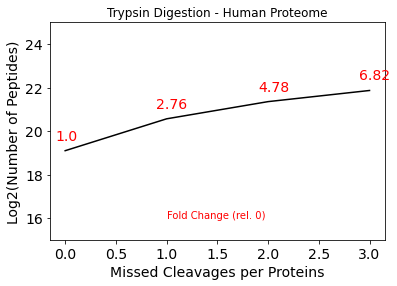

In [21]:
T_Pep_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    log = math.log2(len(df))
    T_Pep_Counts.append(log)
plt.plot(missed_sites,T_Pep_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in T_Pep_Counts:
    ratio=2**(count-T_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,T_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red")
plt.show()

The number of proteins with > 0 peptides : 20573.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20589.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20589.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20590.0
Ratio of Proteins with > 0 Peptides Identified: 100.000


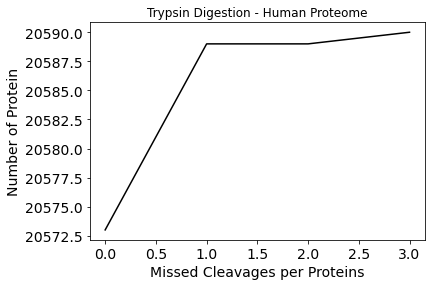

In [22]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The number of proteins with > 1 peptides : 20444.0
Ratio of Proteins with > 1 Peptides Identified: 99.373
The number of proteins with > 1 peptides : 20573.0
Ratio of Proteins with > 1 Peptides Identified: 99.922
The number of proteins with > 1 peptides : 20576.0
Ratio of Proteins with > 1 Peptides Identified: 99.937
The number of proteins with > 1 peptides : 20577.0
Ratio of Proteins with > 1 Peptides Identified: 99.937


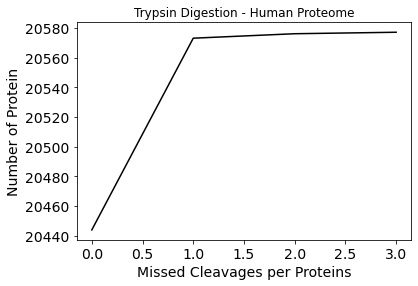

In [23]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
Tryp_Silico_Coverage=pd.DataFrame()
i=0
columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3",]
for df in Tryp_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    for gene, protein in raw.items():
        temp=tuple(df.loc[df.gene == gene]["peptide"])
        x=Chef.Pep2Pro(protein,temp)
        x_list.append(x)
    Tryp_Silico_Coverage[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

On to the next...
On to the next...
On to the next...


In [ ]:
Tryp_Silico_Coverage.head()

In [ ]:
Tryp_Silico_Coverage.replace(np.nan, 0, inplace=True)

In [ ]:
plt.hist(Tryp_Silico_Coverage['SC_Tryp_0'])

In [ ]:
Tryp_Silico_Coverage.to_excel('Silico_Trypsin_Coverage.xlsx')

In [ ]:
df1 = Tryp_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Trypsin-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

## AspN in Silco Digestion

In [ ]:
# AspN in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="asp-n"
AspN_Peptides=[]
for site in missed_sites:
    x=f"AspN_{site}_dig"
    zz=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(zz,meat_package=True)
    AspN_Peptides.append(globals()[str(x)])
    
    

In [ ]:
AspN_Peptides[0]

In [ ]:
len(AspN_Peptides)

In [ ]:
A_Pep_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    log = math.log2(len(df))
    A_Pep_Counts.append(log)
plt.plot(missed_sites,A_Pep_Counts,color="black")
plt.title('AspN Digestion - Human Proteome', fontsize=12)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in A_Pep_Counts:
    ratio=2**(count-A_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,A_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red", fontsize=10)
plt.show()

In [ ]:
A_Pro_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    A_Pro_Counts.append(y)
plt.plot(missed_sites,A_Pro_Counts,color="black")
plt.title('Asp-N Digestion - Human Proteome', fontsize=12)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Proteins', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
raw=Menu[["Peptide", "Gene"]].set_index("Gene").to_dict()["Peptide"]
AspN_Silico_Coverage=pd.DataFrame()
i=0
columns=["AspN_0","AspN_1","AspN_2","AspN_3",]
for df in AspN_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    max_len=len(df)
    for gene, protein in raw.items():
        temp=df.loc[df.gene == gene]["peptide"]
        temp2=list(temp)
        x=Pep2Pro(protein,temp2)
        x_list.append(x)
    AspN_Silico_Coverage[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

In [ ]:
AspN_Silico_Coverage.replace(0,np.nan, inplace=True)

In [ ]:
AspN_Silico_Coverage.describe()

In [ ]:
plt.hist(AspN_Silico_Coverage['SC_AspN_0'])

In [ ]:
AspN_Silico_Coverage.to_excel('Silico_AspN_Coverage.xlsx')

In [ ]:
df1 = AspN_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('AspN-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

## GluC in Silco Digestion

In [ ]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="glutamyl endopeptidase"
for site in missed_sites:
    x=f"GluC_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)

In [ ]:
GluC_0_dig.head()

# Raw Experimental Data